In [519]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import scipy as sp
from pylab import text

import highlight_text

In [530]:
Player_1 = 'Phil Foden'
Player_2 = 'David Silva'
Color_1 = 'deepskyblue'
Color_2 = 'red'

In [531]:
myfont = {'fontname':'DejaVu Sans'}

In [532]:
df1std = pd.read_csv('Foden Standard.txt')
numbers1 = len(df1std['Season'])
df1name = pd.DataFrame({'Player': Player_1 , 'Season': df1std['Season'][0:numbers1]})
df1std = df1std[df1std.LgRank != '6th']

df1std = pd.merge(df1std,df1name,on='Season',how='outer')
df1std = df1std[ ['Player'] + [ col for col in df1std.columns if col != 'Player' ] ]
df1std = df1std.drop_duplicates()
df1std = df1std.reset_index(drop=True)

df2std = pd.read_csv('Silva Standard.txt')
numbers2 = len(df2std['Season'])
df2name = pd.DataFrame({'Player': Player_2 , 'Season': df2std['Season'][0:numbers2]})

df2std = pd.merge(df2std,df2name,on='Season',how='outer')
df2std = df2std[ ['Player'] + [ col for col in df2std.columns if col != 'Player' ] ]
df2std = df2std.reset_index(drop=True)

In [533]:
df1std

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,...,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches
0,Phil Foden,2017-2018,17,Manchester City,eng ENG,1. Premier League,1st,5,0,49,...,0.00,0.00,0.60,0.60,0.00,0.64,0.64,0.00,0.64,Matches
1,Phil Foden,2018-2019,18,Manchester City,eng ENG,1. Premier League,1st,13,3,335,...,0.68,0.68,0.16,0.84,0.67,0.16,0.83,0.67,0.83,Matches
2,Phil Foden,2019-2020,19,Manchester City,eng ENG,1. Premier League,2nd,23,9,901,...,0.43,0.43,0.20,0.63,0.43,0.20,0.63,0.43,0.63,Matches
3,Phil Foden,2020-2021,20,Manchester City,eng ENG,1. Premier League,1st,21,13,1250,...,0.27,0.27,0.24,0.51,0.27,0.24,0.51,0.27,0.51,Matches


In [534]:
df1pas = pd.read_csv('Foden Passing.txt')
df1pas = df1pas[df1pas.LgRank != '6th']
df1pas = df1pas.reset_index(drop=True)

df1cre = pd.read_csv('Foden G&S Creation.txt')
df1cre = df1cre[df1cre.LgRank != '6th']
df1cre = df1cre.reset_index(drop=True)

df2pas = pd.read_csv('Silva Passing.txt')
df2pass = df2pas.reset_index(drop=True)

df2cre = pd.read_csv('Silva G&S Creation.txt')
df2cre = df2cre.reset_index(drop=True)


In [535]:
df1 = pd.merge(df1std,df1pas, on='Season',how='outer')
df1 = pd.merge(df1, df1cre, on='Season',how='outer')

df2 = pd.merge(df2std,df2pas, on='Season', how='outer')
df2 = pd.merge(df2, df2cre, on='Season', how='outer')

In [536]:
df1

,Player,Season,Age_x,Squad_x,Country_x,Comp_x,LgRank_x,MP,Starts,Min,...,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Matches
0,Phil Foden,2017-2018,17,Manchester City,eng ENG,1. Premier League,1st,5,0,49,...,4.00,4.09,4.00,0.0,0.00,0.00,0.0,0.0,0.0,Matches
1,Phil Foden,2018-2019,18,Manchester City,eng ENG,1. Premier League,1st,13,3,335,...,0.27,0.27,0.27,0.0,0.00,0.00,0.0,0.0,0.0,Matches
2,Phil Foden,2019-2020,19,Manchester City,eng ENG,1. Premier League,2nd,23,9,901,...,0.80,0.80,0.80,0.0,0.00,0.00,0.0,0.0,0.0,Matches
3,Phil Foden,2020-2021,20,Manchester City,eng ENG,1. Premier League,1st,21,13,1250,...,0.65,0.65,0.43,0.0,0.07,0.14,0.0,0.0,0.0,Matches


In [537]:
df2

,Player,Season,Age_x,Squad_x,Country_x,Comp_x,LgRank_x,MP,Starts,Min,...,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,OG,Matches
0,David Silva,2004-2005,18,Eibar,es ESP,2. Segunda División,4th,35,32,2819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,David Silva,2005-2006,19,Celta Vigo,es ESP,1. La Liga,6th,34,31,2659,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches
2,David Silva,2006-2007,20,Valencia,es ESP,1. La Liga,4th,36,31,2640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches
3,David Silva,2007-2008,21,Valencia,es ESP,1. La Liga,10th,34,32,2751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches
4,David Silva,2008-2009,22,Valencia,es ESP,1. La Liga,6th,19,17,1475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches
5,David Silva,2009-2010,23,Valencia,es ESP,1. La Liga,3rd,30,28,2409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches
6,David Silva,2010-2011,24,Manchester City,eng ENG,1. Premier League,3rd,35,30,2550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches
7,David Silva,2011-2012,25,Manchester City,eng ENG,1. Premier League,1st,36,33,2800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches
8,David Silva,2012-2013,26,Manchester City,eng ENG,1. Premier League,2nd,32,29,2508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches
9,David Silva,2013-2014,27,Manchester City,eng ENG,1. Premier League,1st,27,26,2161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matches


In [538]:
df1 = df1.dropna()
df2 = df2.dropna()

In [10]:
metrics = ['90s','Min','Gls', 'xG', 'Ast', 'xA']

Text(0.55, 0.03, '@msuatgunerli data via FBref, StatsBomb, Understat & WhoScored')

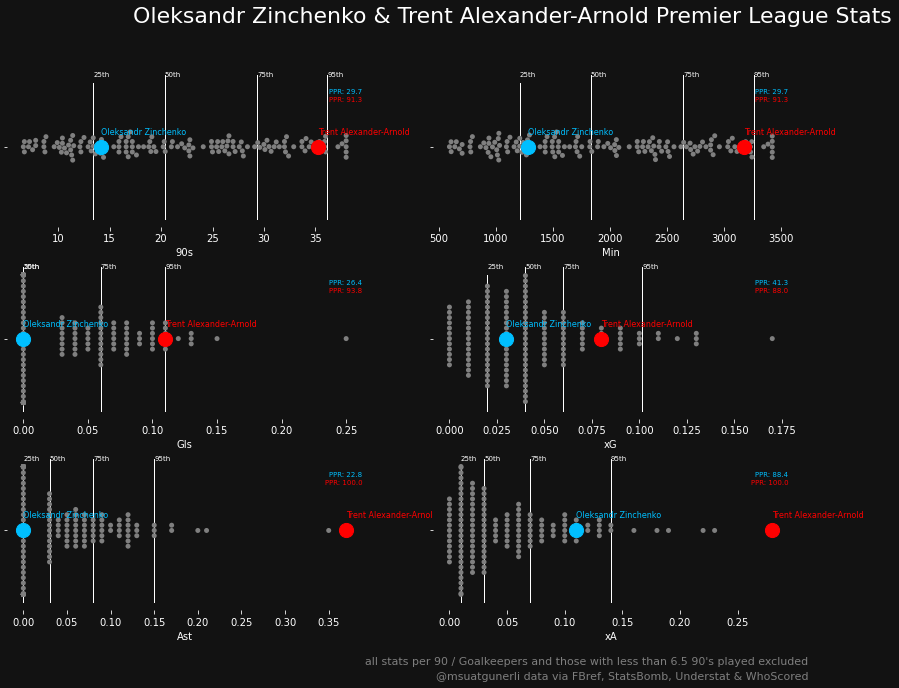

In [19]:
fig,axes = plt.subplots(3,2,figsize=(14,10))
fig.set_facecolor('#121212')

mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

counter=0
counter2=0 
met_counter = 0

for i,ax in zip(df['Player'],axes.flatten()):
    ax.set_facecolor('#121212')
    ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

    spines = ['top','bottom','left','right']
    for x in spines:
        if x in spines:
            ax.spines[x].set_visible(False)

    sns.swarmplot(x=metrics[met_counter],data=df,ax=axes[counter,counter2],zorder=2,color='#7F7F7F')

    per_25 = np.percentile(df[metrics[met_counter]],25)
    ax.axvline(x=per_25, ymin=0.05, ymax=0.95, color='white',zorder=1,linewidth=1,ls='-')
    ax.text(s='25th',x=per_25,y=-0.4394,c='white', size=7) #veya -0.4633

    per_50 = np.percentile(df[metrics[met_counter]],50)
    ax.axvline(x=per_50,ymin=0.05, ymax=0.95,color='white',zorder=1, linewidth=1,ls='-')
    ax.text(s='50th',x=per_50,y=-0.4394,c='white',size=7)

    per_75 = np.percentile(df[metrics[met_counter]],75)
    ax.axvline(x=per_75,ymin=0.05, ymax=0.95,color='white',zorder=1,linewidth=1,ls='-')
    ax.text(s='75th',x=per_75,y=-0.4394,c='white',size=7)

    per_95 = np.percentile(df[metrics[met_counter]],95)
    ax.axvline(x=per_95,ymin=0.05, ymax=0.95,color='white',zorder=1,linewidth=1,ls='-')
    ax.text(s='95th',x=per_95,y=-0.4394,c='white',size=7)

    ax.set_xlabel(f'{metrics[met_counter]}',c='white')

    for x in range(len(df['Player'])):
        if df['Player'][x] == Player_1:
            ax.scatter(x=df[metrics[met_counter]][x],y=0,s=200,c=Color_1,zorder=3)
            ax.text(s= str(Player_1),x=df[metrics[met_counter]][x],y=-.08,c=Color_1,size=8)
            
            per_player1 = sp.stats.percentileofscore(df[metrics[met_counter]],df[metrics[met_counter]][x])
            text(1, 0.85,'PPR: '+ str(round(per_player1,1)), ha='right', va='center', color=Color_1, transform=ax.transAxes, size=7)

        if df['Player'][x] == Player_2:
            ax.scatter(x=df[metrics[met_counter]][x],y=0,s=200,c=Color_2,zorder=3)
            ax.text(s= str(Player_2), x=df[metrics[met_counter]][x],y=-.08,c=Color_2,size=8)

            per_player2 = sp.stats.percentileofscore(df[metrics[met_counter]],df[metrics[met_counter]][x])
            text(1, 0.8,'PPR: '+ str(round(per_player2,1)), ha='right', va='center', color=Color_2, transform=ax.transAxes, size=7)

    met_counter+=1
    if counter2 == 0:
        counter2 = 1
        continue #break out of the current iteration and go to the top, yoksa bire set edip tekrar sıfıra dönecekti
    if counter2 == 1:
        counter2 = 0
        counter+=1

s= str(Player_1) + ' & ' + str(Player_2) + ' Premier League Stats'
highlight_text.fig_text(s=s,
                x=.25, y=.95,
                highlight_weights = ['bold'],
                **myfont,
                fontsize=22,
                #fontfamily = 'Andale Mono',
                color = 'white',
                highlight_colors = Color_1, #oyuncu adı rengi buraya
                va='center',
                zorder=3
               )

fig.text(.48,.05,"all stats per 90 / Goalkeepers and those with less than 6.5 90's played excluded",fontsize=11, fontfamily='Andale Mono',color='#7F7F7F')
fig.text(.55,.03,"@msuatgunerli data via FBref, StatsBomb, Understat & WhoScored",fontsize=11, fontfamily='Andale Mono',color='#7F7F7F')

#plt.savefig('test.png',dpi=500,bbox_inches = 'tight',facecolor=background)



In [12]:
#matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')